# Debate dos Presidenciáveis na SBT - 2018

O debate ocorreu das 17h45 até 19h20 do dia 26 de Setembro de 2018 com a presença dos seguintes presidenciáveis:
- Alvaro Dias (Podemos)
- Cabo Daciolo (Patriota)
- Ciro Gomes (PDT)
- Fernando Haddad (PT)
- Geraldo Alckmin (PSDB)
- Guilherme Boulos (PSOL)
- Henrique Meirelles (MDB)
- Marina Silva (Rede)

O candidato Jair Bolsonaro (PSL) foi convidado, porém não compareceu ao debate, seu nome foi considerado nesta pesquisa assim como o nome do candidato João Amoedo (Novo) que apesar de não ser convidado para os debates detém de um percentual de votos considerável.
***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import spacy

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
pd.set_option('display.max_rows', 200_000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 2_500)

In [10]:
nlp = spacy.load('pt')

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [11]:
nlp.max_length = 3_000_000

Antes de começar as análises com os tweets, vamos dar uma olhada nos dados do Datafolha sobre os presidenciáveis até então. Fonte: https://www.poder360.com.br/banco-de-dados/

In [180]:
datafolha_est = pd.read_csv('datafolha_est.csv')
datafolha_rej = pd.read_csv('datafolha_rej.csv')

datafolha_est['data_pesquisa'] = datafolha_est['data_pesquisa'].apply(lambda x: pd.Timestamp(x).date())
datafolha_rej['data_pesquisa'] = datafolha_rej['data_pesquisa'].apply(lambda x: pd.Timestamp(x).date())

### Dados intenção de votos aos presidenciáveis
***

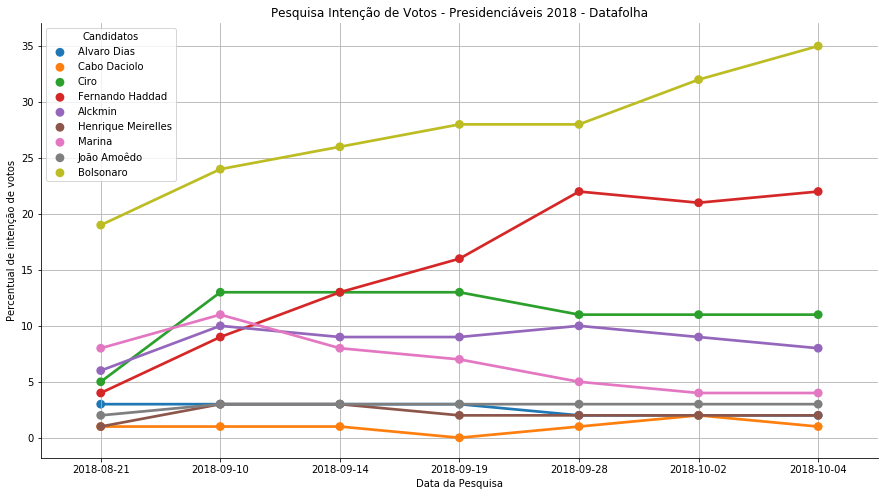

In [184]:
fig, ax = plt.subplots(figsize=(15, 8))

_ = sns.pointplot(x='data_pesquisa',
                  y='percentual',
                  hue='candidato',
                  data=datafolha_est,
                  hue_order=['Alvaro Dias', 'Cabo Daciolo', 'Ciro', 'Fernando Haddad', 'Alckmin', 'Henrique Meirelles',
                             'Marina', 'João Amoêdo', 'Bolsonaro'],
                  ax=ax)

_ = ax.set(title='Pesquisa Intenção de Votos - Presidenciáveis 2018 - Datafolha',
           xlabel='Data da Pesquisa',
           ylabel='Percentual de intenção de votos')

_ = sns.despine()
_ = ax.grid(True)
_ = ax.legend(title='Candidatos')

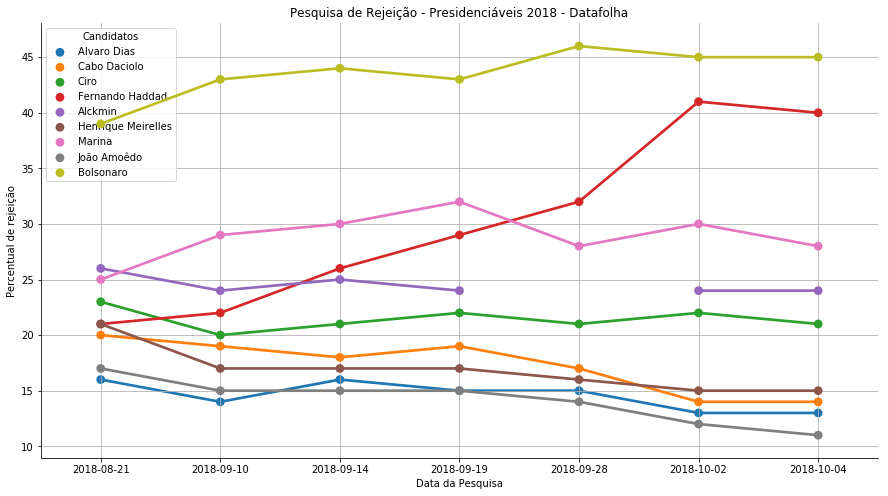

In [185]:
fig, ax = plt.subplots(figsize=(15, 8))

_ = sns.pointplot(x='data_pesquisa',
                  y='percentual',
                  hue='candidato',
                  data=datafolha_rej,
                  hue_order=['Alvaro Dias', 'Cabo Daciolo', 'Ciro', 'Fernando Haddad', 'Alckmin', 'Henrique Meirelles',
                             'Marina', 'João Amoêdo', 'Bolsonaro'],
                  ax=ax)

_ = ax.set(title='Pesquisa de Rejeição - Presidenciáveis 2018 - Datafolha',
           xlabel='Data da Pesquisa',
           ylabel='Percentual de rejeição')

_ = sns.despine()
_ = ax.grid(True)
_ = ax.legend(title='Candidatos')

## Dados twitter durante o debate
***

In [3]:
tweets = pd.read_csv('tweets_debate_limpo.csv')

tweets.head()

,text,hour,minute,second,day,month,year,datetime,text_clean
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,""" foder - o eleição , querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa "" - álvaro"
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,"porra daciolo emocionar o declaração pra mamãe e esposo , meter votar impresso consagrar ? # debatesbt"
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,"daciolo falar , falar bonito ..."
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,"@morgalashnikova n valorizar o grandeza d candidatar antar , perceber enganir . 51 só , pingar e daciolo"


In [4]:
tweets['datetime'] = tweets['datetime'].apply(pd.Timestamp)

In [5]:
tweets.shape

(180490, 9)

- Distribuição dos tweets na primeira hora de debate:

AttributeError: Unknown property c

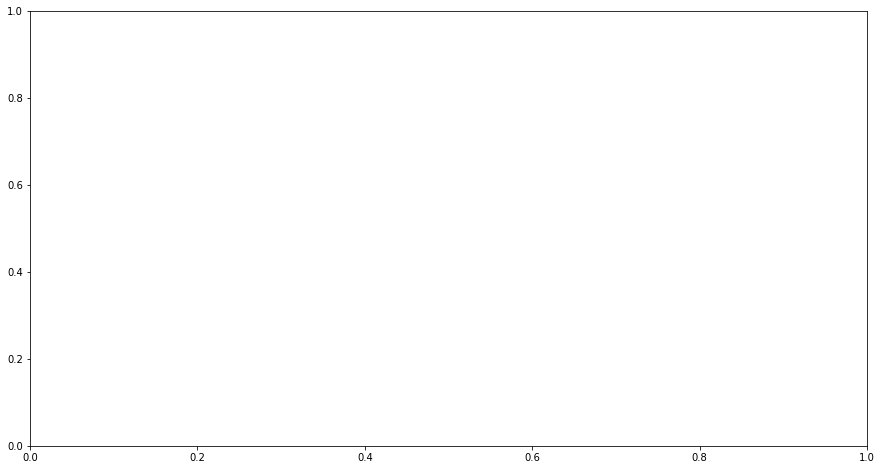

In [188]:
first_hour = tweets[(tweets['datetime']>pd.Timestamp('2018-09-26 17:45:00')) & (tweets['datetime']<=pd.Timestamp('2018-09-26 18:45:00'))]

fig, ax = plt.subplots(figsize=(15, 8))
x_order = list(range(45, 60)) + list(range(0, 45))
ax = sns.countplot(x='minute', data=first_hour, order=x_order, c='r')
_ = ax.set(title='17h45 - 18h45')

- Distribuição dos tweets na segunda hora de debate

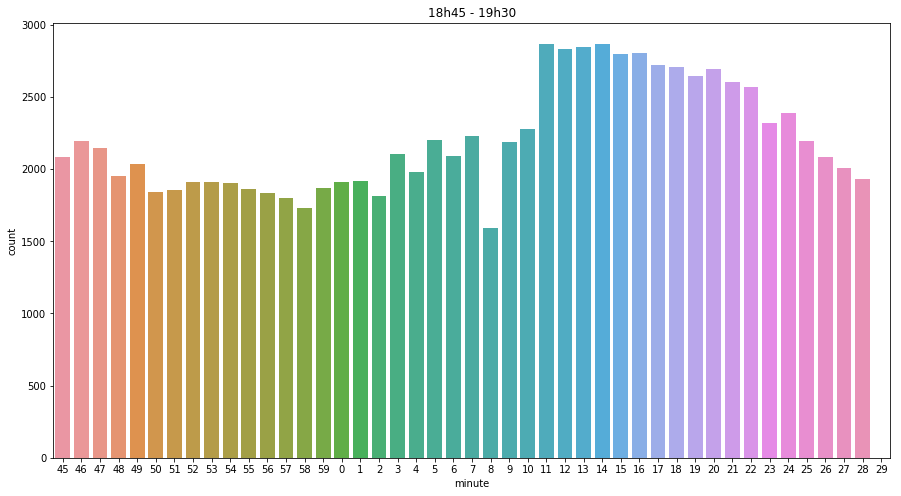

In [7]:
second_hour = tweets[(tweets['datetime']>pd.Timestamp('2018-09-26 18:45:00')) & (tweets['datetime']<=pd.Timestamp('2018-09-26 19:45:00'))]

fig, ax = plt.subplots(figsize=(15, 8))
x_order = list(range(45, 60)) + list(range(0, 30))
ax = sns.countplot(x='minute', data=second_hour, order=x_order)
_ = ax.set(title='18h45 - 19h30')

Aproximadamente 3 picos registrados: 
- 18h11 - 18h16;
- 18h36 - 18h41;
- 19h11 - 19h22.

## Análise do primeiro pico de tweets registrado (18h11 - 18h16)
***

- Funções que serão utilizadas na análise:

In [89]:
import re
from collections import Counter

def localizar_palavra(palavra, dataset): 
    return pd.Series(np.histogram([word.i for word in dataset if word.text.lower() == palavra], bins=50)[0])

def is_word_in_text(word, text):
    pattern = r'(^|[^\w]){}([^\w]|$)'.format(word)
    pattern = re.compile(pattern, re.IGNORECASE)
    matches = re.search(pattern, text)
    return bool(matches)

def plot_contagem_candidatos(df, lista_candidatos):
    contagem = []
    for candidato in lista_candidatos:
        contagem.append(df['text'].astype(str).apply(lambda x: is_word_in_text(candidato, x.lower())).sum())

    plot_df = pd.DataFrame({'candidatos': candidatos, 'contagem': contagem}).sort_values(by='contagem', ascending=False)
    fig, ax = plt.subplots(figsize=(15, 8))
    _ = sns.barplot(x='candidatos', y='contagem', data=plot_df, ax=ax)

def verbs_candidates(text, candidate):
    sents = [sent for sent in text.sents if candidate in sent.string.lower()]
    char_words = []
    for sent in sents: 
        for word in sent: 
            if candidate in word.string: 
                char_words.append(word)
    char_verbs = []
    for word in char_words: 
        for ancestor in word.ancestors: 
            if ancestor.pos_.startswith('V'): 
                char_verbs.append(ancestor.lemma_.strip())
    return Counter(char_verbs).most_common(5)

def frases_candidato_verbo(df, candidato, verbo, qtde=5):
    mask_cand = df['text_clean'].astype(str).apply(lambda x: is_word_in_text(candidato, x))
    mask_verb = df['text_clean'].astype(str).apply(lambda x: is_word_in_text(verbo, x))
    return list(data_1[mask_cand & mask_verb]['text'].head(qtde))

- Separação do dataset com os tweets compreendidos apenas no intervalo de tempo em que a análise será realizada:

In [88]:
data_1 = tweets[(tweets['datetime']>pd.Timestamp('2018-09-26 18:11:00')) & (tweets['datetime']<=pd.Timestamp('2018-09-26 18:14:00'))]
len(data_1)

6888

- Transformação do dataset em documento do spacy:

In [12]:
pico_1 = nlp(str(data_1['text']))

- Lista de candidatos:

In [23]:
candidatos = ['ciro', 'bolsonaro', 'marina', 'alckmin', 'meirelles', 'daciolo', 'álvaro', 'haddad', 'amoedo', 'boulos']

- Gráfico de dispersão lexical:

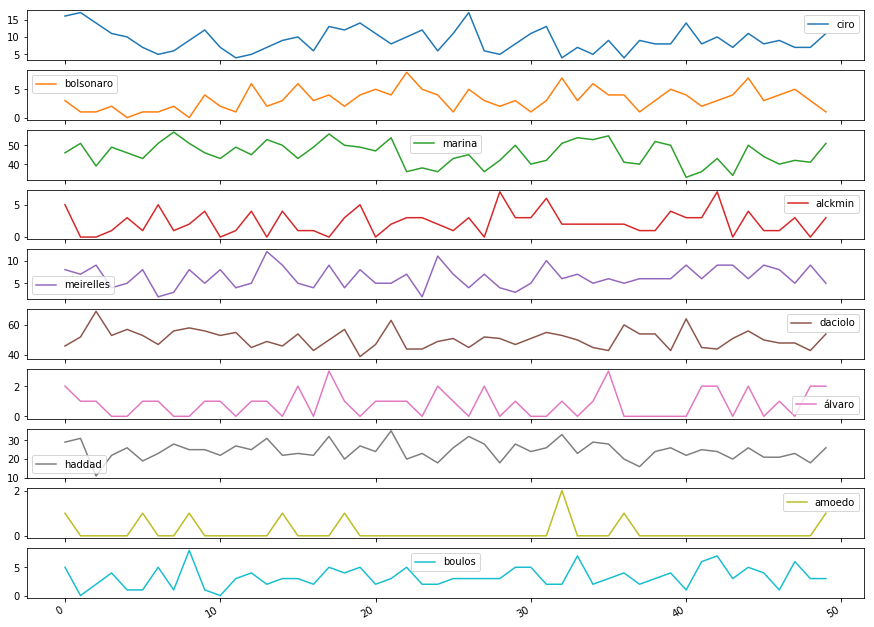

In [25]:
dispersao = pd.DataFrame({name: localizar_palavra(name.lower(), pico_1) for name in candidatos})

_ = dispersao.plot(subplots=True, figsize=(15,12))

Aparentemente neste momento o nome da candidata marina e do candidato haddad aparecem correlacionados.

- Gráfico da contagem de tweets de cada candidato:

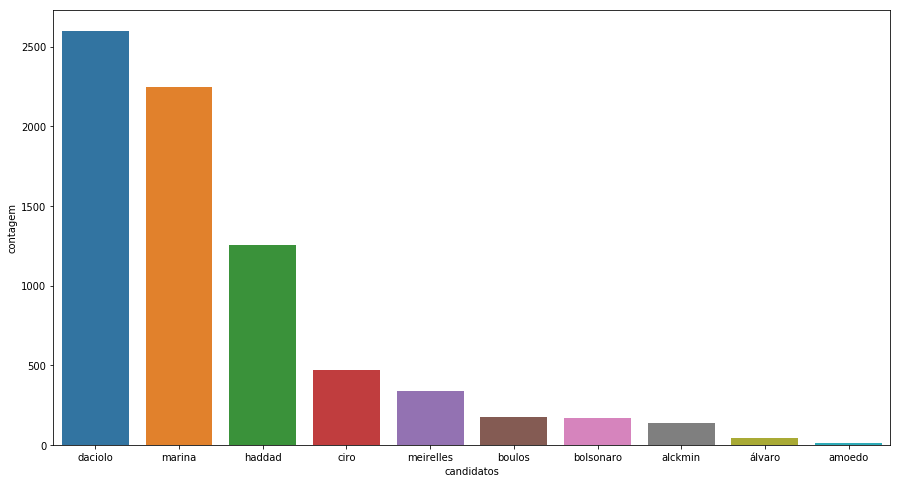

In [87]:
plot_contagem_candidatos(data_1, candidatos)

Verbos que descrevem cada candidato mais comentado neste primeiro pico de tweets (Daciolo, Marina e Haddad):
- Haddad:

In [30]:
verbs_candidates(pico_1, 'haddad')

[('comer', 11), ('dar', 11), ('votar', 6), ('esmurrar', 5), ('ficar', 5)]

- Marina:

In [31]:
verbs_candidates(pico_1, 'marina')

[('ter', 18), ('dar', 17), ('comer', 7), ('apoiar', 6), ('querer', 6)]

- Daciolo:

In [32]:
verbs_candidates(pico_1, 'daciolo')

[('ter', 30), ('fazer', 24), ('dar', 20), ('ver', 19), ('rir', 18)]

Alguns tweets de cada candidato em relação à alguns verbos mais usados:
- Haddad:

In [190]:
frases_candidato_verbo(data_1, 'haddad', 'votar')

['#DebateSBT Marina deu um tapa na cara do Haddad quem vota no PT e porque quer ver o Brasil continua cheio de problemas como está hoje',
 'Se metade dos Alckmin e metade dos Amoedo votarem em Bolsonaro já no 1º turno ele ganha no primeiro turno. Não é voto útil. É voto anti-venezuela, anti-robalheira, voto patriota, voto na família, voto contra a ideologia de gênero, voto na segurança.\r\r\n\r\r\n BOLSONARO 31% X 20% HADDAD https://t.co/qLe1rqKWpi',
 '@vecatsfig @Rayctjay @CarlosE36195435 Quem vota em Haddad ,Alckmin não tem argumentos...a seita não deixa pensar...… https://t.co/Q890tQ8P7P',
 'vcs que vão votar é melhor se perguntarem se o nome vai combinar pq antes a gente falava 10 dilmas 10 temers e falar 10 bolsonaros NAO FICA BONITO então obviamente vcs tem que votar no haddad ou no ciro pq esse é o quesito mais importante a ser seguido em uma eleição',
 'vcs que vão votar é melhor se perguntarem se o nome vai combinar pq antes a gente falava 10 dilmas 10 temers e falar 10 bolson

In [57]:
frases_candidato_verbo(data_1, 'haddad', 'esmurrar')

['Marina esmurrando o Haddad no Debate. VAI MARINAAA ACABA COM ESSE FANTOCHE. #MarinaComCiro #Ciro12 #DebateSBT #CironoSBT',
 'a marina esmurrou muito o haddad agora.. ele tava espumando pelos olhos enquanto ela falava',
 '#DebateNoSBT Haddad esmurrou Marina q virou e socou duas vezes a cara do Haddad',
 'nossa agora eu fiquei caralho haddad esmurrou depois porra marina esmurrou mais haddad marina haddad marin #DebateSBT',
 '#DebateSBT MARINA ESMURROU O HADDAD, QUE MULHER E TUDO ISSO DEMOCRATICAMENTE']

- Marina:

In [67]:
# spacy entendeu 'marina' como 'marino'
frases_candidato_verbo(data_1, 'marino', 'apoiar')

['Marina mulher, deixe de churumelas que a gente sabe que tu apoiou o Temer no golpe #DebateSBT',
 'a marina apoia o impeachment e depois vem no debate colocar a culpa no PT\r\r\n\r\r\nque cara dura',
 'ué, mas o renan calheiros não apoiou o impeachment, marina. risos.',
 'O assustador desse último embate entre Haddad e Marina acerca do nome do Temer é que os dois tão certos: Marina apoiou o impeachment e ajudou a colocar o Temer ali, mas Temer e as alianças com o PMDB foram parte da política padrão do PT (e ainda hoje, localmente, vide Eunício).',
 'O assustador desse último embate entre Haddad e Marina acerca do nome do Temer é que os dois tão certos: Marina apoiou o impeachment e ajudou a colocar o Temer ali, mas Temer e as alianças com o PMDB foram parte da política padrão do PT (e ainda hoje, localmente, vide Eunício).']

In [68]:
frases_candidato_verbo(data_1, 'marino', 'querer')

['Haddad: se faz de sonso \r\r\nAlckmin: falso que só a desgraça \r\r\nCiro: Bolsonaro da esquerda \r\r\nBolsonaro: Ciro da direita \r\r\nMarina: nem ela quer ser presidente \r\r\n\r\r\nDaciolo: bonito, carismático e sensato',
 '@MBLivre Haddad quis fugir do daciolo mas se deu mal com Marina',
 'Nossa Marina, quero voltar pro ensino médio. Ótima proposta! #DebateSBT',
 'Parabéns Marina, colocando o Haddad no seu devivo Lugar, fala o que quer e ouve o que não quer #DebateSBT #Ciro12… https://t.co/nY7rE9wGQP',
 '#DebateSBT Marina deu um tapa na cara do Haddad quem vota no PT e porque quer ver o Brasil continua cheio de problemas como está hoje']

- Daciolo:

In [72]:
frases_candidato_verbo(data_1, 'daciolo', 'rir')

['PARA DE RIR DO DACIOLO VÉI DESGRAÇADO',
 'EU TO RINDO MT DO CABO DACIOLO KKKKKKKK SOCORRO #DebateSBT',
 'eu não consigo não ri com o cabo daciolo',
 'O Meirelles rindo do Daciolo kkkkkkkk #DebateSBT',
 'O Daciolo, aaaaah eu morro de rir demais da conta']

## Análise de Sentimentos
***

In [90]:
# Datasets train e holdout anteriormente tratados (notebook Preprocessing)
train = pd.read_csv('tweets_train.csv')
holdout = pd.read_csv('tweets_holdout.csv')

In [91]:
train.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,foder o eleição querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa álvaro,0.0
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus,1.0
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,porra daciolo emocionar o declaração pra mamãe e esposo meter votar impresso consagrar debatesbt,-1.0
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,daciolo falar falar bonito,1.0
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,@morgalashnikova n valorizar o grandeza d candidatar antar perceber enganir 51 só pingar e daciolo,1.0


In [92]:
holdout.head()

,text,hour,minute,second,day,month,year,datetime,text_clean
0,A Questão é o Trabalho 9 debate a Contribuição Sindical com o desembargador Luiz Eduardo Gunther: https://t.co/DbIrDjVAJq via,19,19,23,26,9,2018,2018-09-26 19:19:23,o o 9 debater o contribuição sindical o desembargador luiz eduardo gunther
1,"São Paulo Futebol Clube ou, segundo o Alckmin, O Time Lá. #DebateSBT",18,47,47,26,9,2018,2018-09-26 18:47:47,paulo futebol clube segundar o alckmin o time debatesbt
2,Marina destruindo o RADADI,18,10,44,26,9,2018,2018-09-26 18:10:44,marino destruir o radadi
3,Boulos eu te amo!❤,19,6,55,26,9,2018,2018-09-26 19:06:55,boulos amar ❤
4,"O assustador desse último embate entre Haddad e Marina acerca do nome do Temer é que os dois tão certos: Marina apoiou o impeachment e ajudou a colocar o Temer ali, mas Temer e as alianças com o PMDB foram parte da política padrão do PT (e ainda hoje, localmente, vide Eunício).",18,14,17,26,9,2018,2018-09-26 18:14:17,o assustador d embater entrar haddad e marino acercar temer o certo marino apoiar o impeachment e ajudar o colocar o temer temer e o aliançar o pmdb político padrão pt e localmente vidar eunício


In [93]:
train.shape

(1000, 10)

- No processo de normalização dos tweets há a retirada de stopwords, o que pode gerar um output nulo em tweets com apenas stopwords:

In [95]:
holdout[holdout['text_clean'].isnull()].head()

,text,hour,minute,second,day,month,year,datetime,text_clean
653,Eu todinha,18,10,6,26,9,2018,2018-09-26 18:10:06,NaN
1559,Muito,18,27,41,26,9,2018,2018-09-26 18:27:41,NaN
1736,que assim seja.,18,38,5,26,9,2018,2018-09-26 18:38:05,NaN
2624,Isso numa quarta,19,17,14,26,9,2018,2018-09-26 19:17:14,NaN
3069,É verdade,19,24,58,26,9,2018,2018-09-26 19:24:58,NaN


In [96]:
holdout = holdout.dropna()

- Pré-processamento dos datasets:

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [107]:
n_train = train.shape[0]
full = pd.concat([train, holdout], ignore_index=True, sort=False)
full = full['text_clean'].copy()

In [108]:
full.shape

(180304,)

In [109]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(full)

In [110]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X)

In [112]:
train_tfidf = X[:n_train, :]
holdout_tfidf = X[n_train:, :]
y = train['sentiment']

- Random Forest Classifier:

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [127]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50).fit(train_tfidf, y)

In [128]:
cross_val_score(rf, train_tfidf, y, cv=10, scoring='accuracy').mean()

0.626004400440044

In [129]:
preds = rf.predict(holdout_tfidf)

In [130]:
holdout['sentiment'] = preds

In [131]:
holdout.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment
0,A Questão é o Trabalho 9 debate a Contribuição Sindical com o desembargador Luiz Eduardo Gunther: https://t.co/DbIrDjVAJq via,19,19,23,26,9,2018,2018-09-26 19:19:23,o o 9 debater o contribuição sindical o desembargador luiz eduardo gunther,0.0
1,"São Paulo Futebol Clube ou, segundo o Alckmin, O Time Lá. #DebateSBT",18,47,47,26,9,2018,2018-09-26 18:47:47,paulo futebol clube segundar o alckmin o time debatesbt,-1.0
2,Marina destruindo o RADADI,18,10,44,26,9,2018,2018-09-26 18:10:44,marino destruir o radadi,1.0
3,Boulos eu te amo!❤,19,6,55,26,9,2018,2018-09-26 19:06:55,boulos amar ❤,1.0
4,"O assustador desse último embate entre Haddad e Marina acerca do nome do Temer é que os dois tão certos: Marina apoiou o impeachment e ajudou a colocar o Temer ali, mas Temer e as alianças com o PMDB foram parte da política padrão do PT (e ainda hoje, localmente, vide Eunício).",18,14,17,26,9,2018,2018-09-26 18:14:17,o assustador d embater entrar haddad e marino acercar temer o certo marino apoiar o impeachment e ajudar o colocar o temer temer e o aliançar o pmdb político padrão pt e localmente vidar eunício,-1.0


- Junção de todo o dataset para fazer a análise como um todo:

In [133]:
full_tweets = pd.concat([train, holdout], ignore_index=True)

In [134]:
full_tweets.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,foder o eleição querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa álvaro,0.0
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus,1.0
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,porra daciolo emocionar o declaração pra mamãe e esposo meter votar impresso consagrar debatesbt,-1.0
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,daciolo falar falar bonito,1.0
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,@morgalashnikova n valorizar o grandeza d candidatar antar perceber enganir 51 só pingar e daciolo,1.0


- Criação de mais uma coluna para cada candidato onde assumirão os seguintes valores:
    - -5, se o candidato não foi citado no tweet;
    - -1, se o candidato foi citado no tweet e o tweet apresenta sentimento negativo;
    - 0, se o candidato foi citado no tweet e o tweet apresenta sentimento neutro;
    - 1, se o candidato foi citado no tweet e o tweet apresenta sentimento positivo.

In [135]:
nomes_candidatos = ['marina', 'haddad', 'boulos', 'meireles', 'daciolo', 'bolsonaro', 'alckmin', 'amoedo', 'álvaro']

for candidato in nomes_candidatos:
    candidato_sentiments = []
    
    for idx, row in enumerate(full_tweets['text']):
        if candidato in row.lower():
            candidato_sentiments.append(full_tweets.loc[idx, 'sentiment'])
        else:
            candidato_sentiments.append(-5)
            
    full_tweets[candidato] = candidato_sentiments

In [136]:
full_tweets.head()

,text,hour,minute,second,day,month,year,datetime,text_clean,sentiment,marina,haddad,boulos,meireles,daciolo,bolsonaro,alckmin,amoedo,álvaro
0,"""foda-se a eleição, eu quero ver o jogo porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"" - Álvaro Dias",19,24,23,26,9,2018,2018-09-26 19:24:23,foder o eleição querer o jogar porrraaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa álvaro,0.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0
1,MANO O DACIOLO É FODA GLÓRIA DEUS,19,12,45,26,9,2018,2018-09-26 19:12:45,manir o daciolo foder glória deus,1.0,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
2,"Porra Daciolo eu tinha até me emocionado com a declaração pra mamãe e esposa, agora tu mete essa de voto impresso meu consagrado? #DebateSBT",19,13,41,26,9,2018,2018-09-26 19:13:41,porra daciolo emocionar o declaração pra mamãe e esposo meter votar impresso consagrar debatesbt,-1.0,-5.0,-5.0,-5.0,-5.0,-1.0,-5.0,-5.0,-5.0,-5.0
3,"Daciolo falou pouco, mas falou bonito...",18,37,45,26,9,2018,2018-09-26 18:37:45,daciolo falar falar bonito,1.0,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
4,"@morgalashnikova Eu n valorizei a grandeza desse candidato antes, mas agora eu percebi meu engano. 51 é só coisa boa, pinga e Daciolo",19,12,20,26,9,2018,2018-09-26 19:12:20,@morgalashnikova n valorizar o grandeza d candidatar antar perceber enganir 51 só pingar e daciolo,1.0,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0


In [137]:
full_tweets.iloc[:, 10:].head()

,marina,haddad,boulos,meireles,daciolo,bolsonaro,alckmin,amoedo,álvaro
0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0
1,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
2,-5.0,-5.0,-5.0,-5.0,-1.0,-5.0,-5.0,-5.0,-5.0
3,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0
4,-5.0,-5.0,-5.0,-5.0,1.0,-5.0,-5.0,-5.0,-5.0


- Criação de um novo dataframe com a contagem dos sentimentos de cada tweet relacionado ao candidato mencionado:<br>
    <sub>* A análise leva em consideração o sentimento em que a pessoa demonstrou ao escrever o tweet, pode não apresentar uma correlação com o sentimento em relação ao candidato.</sub>

In [138]:
qtde_tweets = {}
for candidato in nomes_candidatos:
    positivos = len(full_tweets[full_tweets[candidato]==1][candidato])
    neutros = len(full_tweets[full_tweets[candidato]==0][candidato])
    negativos = len(full_tweets[full_tweets[candidato]==-1][candidato])
    
    qtde_tweets[candidato] = [positivos, neutros, negativos]

In [139]:
qtde_tweets_df = pd.DataFrame(qtde_tweets, index=['positivos', 'neutros', 'negativos']).T

qtde_tweets_df['total'] = qtde_tweets_df.sum(axis=1)
qtde_tweets_df = qtde_tweets_df.sort_values(by='total', ascending=False)
qtde_tweets_df

,positivos,neutros,negativos,total
daciolo,48032,7019,5997,61048
haddad,12062,6360,11297,29719
marina,10179,3093,6151,19423
bolsonaro,2834,2918,6309,12061
boulos,6253,1978,2618,10849
alckmin,751,2635,4963,8349
álvaro,1990,640,2047,4677
meireles,427,513,530,1470
amoedo,258,488,330,1076


- Gráfico de análise de sentimento em relação a cada candidato mencionado:

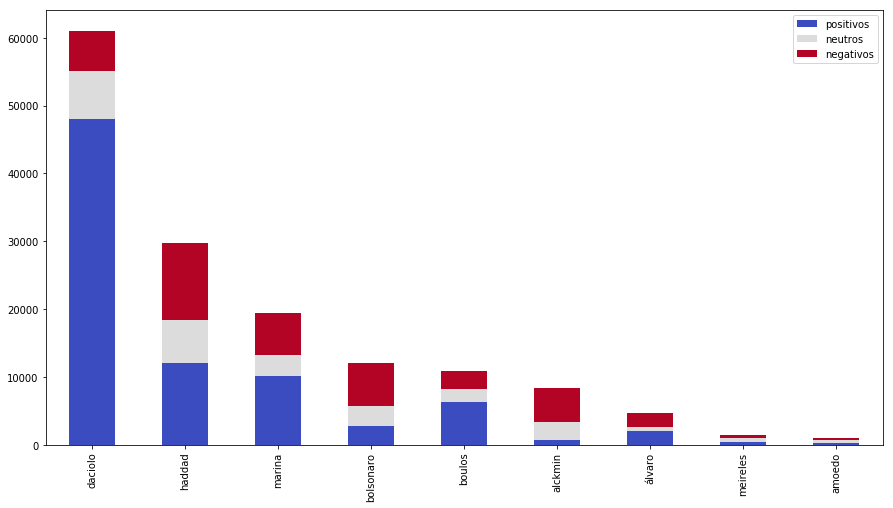

In [143]:
qtde_tweets_df.drop('total', axis=1).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15,8));